<a href="https://colab.research.google.com/github/unizard/2019.Spring.AI/blob/master/Labs_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

안녕하세요. 세종대학교 지능기전공학부 최유경 교수입니다.

본 자료는 인공지능 실습 수업 참고자료이며,  "Tensorflow를 이용한 선형회귀" 입니다.

수고해주실 조교님들께, 감사의 마음을 가집시다. 

---


# [필독] 반드시 본인의 구글 드라이브로 사본 만들어 사용하세요


- [사본 만들어 Colab 실행하기 메뉴얼](https://www.dropbox.com/s/39wkiew6p5yqhpl/%EC%82%AC%EB%B3%B8%EB%A7%8C%EB%93%A4%EC%96%B4%20%EC%A7%84%ED%96%89%ED%95%98%EA%B8%B0_%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8.pptx?dl=0)
  - 김지원 조교님 제공

---







### 텐서플로우 공부법

- 메뉴얼을 참고합니다. 
  - 텐서플로우 메뉴얼 공홈: https://www.tensorflow.org/api_docs/python/tf
  - 텐서플로우 메뉴얼 한글화 공홈: https://tensorflowkorea.gitbooks.io/tensorflow-kr/


<br>

### 파이썬 문법이 잠시 기억이??
- 점프투파이썬 위키에서 살짝 찾아봅시다.
  - https://wikidocs.net/book/1

### 한문장으로 요약하기
-  텐서플로우는 그래프를 만들 후 세션에서 실행시키는 구조를 가집니다.
- 그래프는 node와 edge로 이루어져 있으며, Node는 operation 과 같은 작업과 같은 말입니다.
- 세션을 실행하기 위해 run(), 닫기위해 close() 를 호출합니다.

---

### Rereference
- 모두의 딥러닝
- 안경잡이개발자
- etc






### [실습1] 텐서플로우를 이용하여 상수를 다루는 법

In [39]:
# tensorflow라는 라이브러리를 tf 라는 이름으로 사용하기 위해 아래와 같이 import
import tensorflow as tf

# 1 이라는 원소를 가진 텐서를 만들어 a에 대입하여라
# 텐서는 다차원 배열과 같다. 
a = tf.constant(1)

# 2 라는 원소를 가진 텐서를 만들어 b에 대입하여라
b = tf.constant(2)

# a와 b를 더하여 c라는 텐서에 대입하여라
c = tf.add(a,b)

''' 
=================================
[중요] 
텐서플로우 연산은 세션을 통해 "연산을 수행"시켜야 결과를 볼 수 있습니다!!!!
=================================
'''
# 먼저 세션을 열고
sess = tf.Session()

# 세션을 수행합니다.
sess.run(c)


3

### [실습2] 텐서플로우를 이용해 변수를 다루는 법

In [40]:
import tensorflow as tf

# 5 라는 값의 텐서 변수를 a 에 담고
a = tf.Variable(5)

# 3 라는 값의 텐서 변수를 b 에 담고
b = tf.Variable(3)

# 텐서 a와 텐서 b의 곱을 c에 담는 연산자를 설정하고
c = tf.multiply(a,b)

# ===============
# [중요]상수와 변수의 차이!!변수는 이부분이 핵심!!
# ===============
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
v = sess.run(c)
print(v)



# 변수 a 는 변경하능하다. 15로 변경해보자.
a = tf.Variable(15)

# 변수값이 변경되었으면, C도 다시 초기화 해줘야 한다.
c = tf.multiply(a,b)

# 변수값이 바뀌었으니, init도 초기화해줘야 한다.
init = tf.global_variables_initializer()

sess.run(init)
v = sess.run(c)
print(v)


15
45


### [실습3] Placeholder 이해하기

- Placeholder는 다른 텐서를 할당하기 위해 사용하며, 이런 과정을 feeding이라고 한다.

- 텐서플로우는 그래프 형태의 표현을 활용한다.
- 이처럼 아래의 그림에서는 입력을 담아 x가 출력을 조절하도록 할 수 있는 플레이스 홀더이다.
![image](https://user-images.githubusercontent.com/11758940/55094840-8088b600-50fa-11e9-9e07-2df88710e04b.png)


- tf.placeholder(dtype, shape, name)
  - dtype: 플레이스홀더에 저장되는 자료형
  - shape: 배열의 차원을 의미
  - name: 플레이스 홀더의 이름을 의미

In [43]:
# 플레이스홀더 예제 1
import tensorflow as tf

input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)
y = x + 5

sess = tf.Session()
result = sess.run(y,feed_dict={x: input})

print(result)




[ 6.  7.  8.  9. 10.]


In [44]:
# 플레이스홀더 예제2
import tensorflow as tf

mathScore = [85, 99, 84, 97, 92]
englishScore = [59, 80, 84, 68, 77]

a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = (a+b)/2

sess = tf.Session()
result = sess.run(y,feed_dict={a: mathScore, b: englishScore})

print(result)


[72.  89.5 84.  82.5 84.5]


### [실습4] 주요 함수 

|함수이름| 기능|
|--|--|--|
| tf.add | 덧셈 |
| tf.subtract | 뺄셈 |
| tf.multiply |곱셉 |
| tf.truediv | 나눈 몫|
| tf.mod | 나눈 나머지|
| tf.abs | 절대값 |

In [45]:
import tensorflow as tf

#
a = tf.constant(17)
b = tf.constant(5)

'''
주요 함수 사용하기
'''
sess = tf.Session()
c = tf.add(a,b)
v1 = sess.run(c)

c = tf.subtract(a,b)
v2 = sess.run(c)

c = tf.multiply(a,b)
v3 = sess.run(c)

c = tf.truediv(a,b)
v4 = sess.run(c)

c = tf.mod(a,b)
v5 = sess.run(c)

c = -a
v6 = sess.run(c)

print(v1, v2, v3, v4, v5, v6)


22 12 85 3.4 2 -17


### [실습4-2] 주요함수

함수명 | 함수기능
--|--
tf.negative | 음수를 반환
tf.sign | 부호를 반환
tf.square | 제곱을 수행
tf.sqrt | 제곱근을 반환
tf.pow | 거듭제곱을 수행
tf.maximum | 더 큰 값을 반환
tf.minimum | 더 작은 겂을 반환
tf.exp | 지수 값을 계산
tf.log | 로그 값을 계산

In [46]:
import tensorflow as tf


a = tf.constant(17.5)
b = tf.constant(5.0)

c = tf.negative(a)
v1 = sess.run(c)

c = tf.sign(a)
v2 = sess.run(c)


c = tf.square(a)
v3 = sess.run(c)

c = tf.pow(a,2)
v4 = sess.run(c)


c = tf.maximum(a,b)
v5 = sess.run(c)

c = tf.minimum(a,b)
v6 = sess.run(c)

c = tf.exp(b)
v7 = sess.run(c)

c = tf.log(b)
v8 = sess.run(c)

c = tf.sin(b)
v9 = sess.run(c)

c = tf.cos(b)
v10 = sess.run(c)

print(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10)







-17.5 1.0 306.25 306.25 17.5 5.0 148.41316 1.609438 -0.9589243 0.2836622


### [실십5] 아키텍처

- 텐서플로우는 기본적으로 대규모 분산 학습 및 추론을 위한 라이브러리다. 기계학습 모델을 제공한다.

- 텐서플로우는 크로스 플랫폼 라이브러리다. (os 의존성 없다는 의미!!)

- 다양한 프로그래밍 언어를 이용해 작성이 가능하다.

![image](https://user-images.githubusercontent.com/11758940/55097018-59cc7e80-50fe-11e9-9512-6d6de8992514.png)


- 클라이언트
  - 컴퓨터 연산 과정을 데이터 플로우 그래프 형태로 표현

- 분산된마스터
  - 


- 작업자서비스
  - 특정 하드웨어에게 적절한 커널 기능을 이용하는 그래프 작업의 실행을 관리
  - 다른 작업자 서비스와 실행 결과를 주고 받는다

- 커널 기능
  - 실질적인 작업 가능 
  - 작업구성도를 그래프로 그릴수 있음




### [실습6] 세션
- 텐서플로우는 방향그래프를 기반으로 설계되어 있는 기계학습 라이브러리이다. 따라서 일반적인 프로그래밍과는 차이가 있다.

In [47]:
import tensorflow as tf

a = tf.constant(17.5)
b = tf.constant(5.0)
c = tf.add(a,b)

# 값이 아니라, 텐서를 출력했다.
print(c)

# 즉, 위와 같은 명령어는 실제로 연산을 수행한 것이 아니라
# 그래프를 정의한 것이다.
# 연산을 수행하기 위해서는, 
# a와 b에 데이터를 넣어서 흐름(flow)가 이루어지도록 만들어야 합니다. 


Tensor("Add_28:0", shape=(), dtype=float32)


In [48]:
# 이렇게! 흐름을 실행해야 한다.

sess = tf.Session()
sess.run(c)

# 즉, 세션은 실제로 값을 대입한 그래프가 동작하도록 하는 역할을 수행하는 것이다.!!!!


22.5

### [실습7-1] Linear Regression

- 수업시간에 사용했던 예제를 텐서플로우로 실행해 봅시다.

- W와 b 값만 출력해보겠습니다.

In [49]:


import tensorflow as tf

# 랜덤 시드 설정
tf.set_random_seed(777) 

# X and Y 설정
x_train = [1, 2, 3]
y_train = [1, 2, 3]


# 텐서 크기 1짜리 랜덤 값을 텐서변수 W에 대입하고, 이름을 weight라고 지정
W = tf.Variable(tf.random_normal([1]), name="weight")

# 텐서 크기 1짜리 랜덤 값을 텐서변수 b에 대입하고, 이름을 bias라고 지정
b = tf.Variable(tf.random_normal([1]), name="bias")

# 텐서 변수 초기화
init_op = tf.global_variables_initializer()

# 세션 생성
sess = tf.Session()

# 세션 실행하며, 초기화 변수 입력으로 넣기
sess.run(init_op)

# 세션 실행하여 W, b 값 입력 후, 출력 값 요청하기
W_final, b_final = sess.run([W,b])

print(W_final, b_final)

# 아마, 값이 많이 흔들리고 비용함수 반복 회사가 적은거 같습니다. ㅎ
# 더욱 관여해 봅시다.

[0.10883902] [1.6879869]


### [실습7-2] Linear Regression

- 비용함수 최소화 과정의 cost 값과 W값 b 값의 변화량을 출력해봅시다.

In [50]:

import tensorflow as tf

# 랜덤 시드 설정
tf.set_random_seed(777)  

# X and Y 설정
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 텐서 크기 1짜리 랜덤 값을 텐서변수 W에 대입하고, 이름을 weight라고 지정
W = tf.Variable(tf.random_normal([1]), name="weight")

# 텐서 크기 1짜리 랜덤 값을 텐서변수 b에 대입하고, 이름을 bias라고 지정
b = tf.Variable(tf.random_normal([1]), name="bias")


# 가설 설정 그래프 생성
hypothesis = x_train * W + b

# 로스 함수/비용 함수 그래프 생성
# 선형 회귀 함수 방정식에 맞게 비용 함수 아래와 같이 작성
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# 최소값을 찾기 위해 아래와 같이 "경사하강최적화방법"을 설정
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 세션열고, 실행하여 비용함수의 최소값을 구해봄
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# range 안의 10001과 step%1000의 1000은 변경해서 결과를 출력해보셔도 좋습니다.
for step in range(10001):
  # _, 의 의미는 리턴값을 받겠다는 말
  _, cost_val, W_val, b_val = sess.run([train, cost, W, b])

  # 1000번 돌때마다 결과 값을 출력
  if step % 1000 == 0:
      print(step, cost_val, W_val, b_val)


# 주석: 
# 10000번 정도의 반복회수를 돌려보니, 
# 우리가 원했던 W = 1, b = 0 에 가까운 결과를 얻고 있나요? 


0 17.836884 [-0.18748619] [-1.2540929]
1000 0.00043984418 [1.0242997] [-0.05523885]
2000 3.5707417e-06 [1.0021895] [-0.00497717]
3000 2.9295208e-08 [1.0001987] [-0.00045087]
4000 2.433893e-10 [1.0000182] [-4.105903e-05]
5000 1.6342483e-11 [1.000005] [-1.0156763e-05]
6000 1.22781785e-11 [1.0000043] [-8.61255e-06]
7000 1.22781785e-11 [1.0000043] [-8.61255e-06]
8000 1.22781785e-11 [1.0000043] [-8.61255e-06]
9000 1.22781785e-11 [1.0000043] [-8.61255e-06]
10000 1.22781785e-11 [1.0000043] [-8.61255e-06]


### [실습7-3] Linear Regression

- 비용함수 최소화 과정의 cost 값과 W값 b 값의 변화량을 "그림으로" 출력해봅시다.

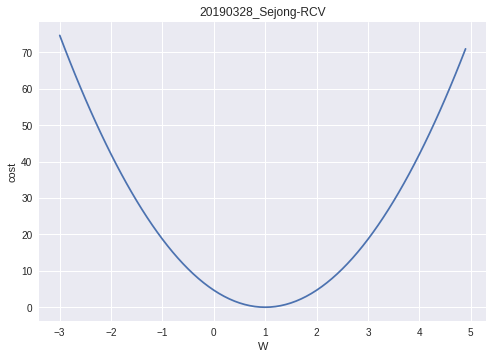

In [51]:
# 텐서플로우 사용을 위한 라이브러리 추가
import tensorflow as tf

# 그림을 그리기 위한 라이브러리 추가
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

# 
W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_history = []
cost_history = []
sess = tf.Session()

# 그림그리기 위한 W와 cost 변화 값 저장
for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})

    # append 는 링크드리스트에서 매번 데이터를 insert 하는 것과 동일합니다.
    W_history.append(curr_W)
    cost_history.append(curr_cost)


# Show the cost function
plt.title('20190328_Sejong-RCV') 
plt.ylabel('cost')
plt.xlabel('W')
plt.plot(W_history, cost_history)
plt.show()

### [실습8-1] Multi-variable Linear Regression

- 입력데이터 3개에 대한 예제

In [32]:

import tensorflow as tf
tf.set_random_seed(777)  

# 인스턴스가 여러개인 3명의 데이터를 입력한다. 
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

# 각각에 대한 결과 값 데이터를 입력한다.
y_data = [152., 185., 180., 196., 142.]


# 모든 텐서를 플레이스홀더로 지정
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 그리고 가설 생성을 위한 텐서변수 설정
w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화방법을 풀기위해 경사하강방법 지정 동시에 learnign_rate 설정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)

# 최적화 함수에 비용함수 최소값을 구하도록 설정
train = optimizer.minimize(cost)

# 세션 열고, 세션 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습 시작, 중간에 과정결과 출력
# 출력위헤 10001과 2000은 직접 변경 가능
for step in range(10001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 2000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)



0 Cost:  31820.885 
Prediction:
 [-19.769941    3.4082124 -11.024435   -8.48731     6.6539555]
2000 Cost:  25.65971 
Prediction:
 [143.45578 189.92831 177.79428 196.43637 147.09421]
4000 Cost:  9.581205 
Prediction:
 [146.45729 187.88182 178.72815 197.0016  144.50174]
6000 Cost:  4.0678144 
Prediction:
 [148.2218  186.68282 179.28235 197.29718 143.01721]
8000 Cost:  2.1349876 
Prediction:
 [149.266   185.97711 179.61522 197.43752 142.17596]
10000 Cost:  1.4195963 
Prediction:
 [149.89043 185.55875 179.81886 197.48906 141.70781]


### [실습8-2] Multi-variable Linear Regression

- 매번 모든 데이터에 대한 변수를 설정하던 부분을 Matrix를 이용한 Multi-variable 다루기
- 행렬은 좋은 것!!

In [37]:

import tensorflow as tf
tf.set_random_seed(777)  


# 입력 출력 데이터 행렬로 정의
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# X와 Y를 플레이스홀더에 담는다.
# Matrix 형태로 담을 것이므로, shape을 지정한다.
# None은 입력해주는데로 설정하겠다는 뜻으로, 
# C언어의 배열초기화 시 사용하던 아래와 동일한 표현
# int array[] = {1,2,3,4,5,6}; 

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# W,b는 텐서 변수 지정
# 달라진 점은 입력데이터 행렬설정에 따른 W 값의 shape 변화
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# 가설 그래프 정의
# 역시 달라진 점은, 행렬의 곱으로 정의
hypothesis = tf.matmul(X, W) + b

# 비용함수 그래스 정의
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화방법을 풀기위해 경사하강방법 지정 동시에 learnign_rate 설정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)

# 최적화 함수에 비용함수 최소값을 구하도록 설정
train = optimizer.minimize(cost)


# 세션 열고, 세션 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습 시작, 중간에 과정결과 출력
# 출력위헤 10001과 2000은 직접 변경 가능
for step in range(10001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 2000 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)



0 Cost:  1716.2703 
Prediction:
 [[185.41847]
 [230.6065 ]
 [223.0245 ]
 [243.81056]
 [177.32204]]
2000 Cost:  1.35478 
Prediction:
 [[149.72653]
 [185.76413]
 [179.85558]
 [196.63243]
 [142.77493]]
4000 Cost:  0.69910693 
Prediction:
 [[150.33551]
 [185.35152]
 [180.04831]
 [196.7239 ]
 [142.27399]]
6000 Cost:  0.46326938 
Prediction:
 [[150.69786]
 [185.10774]
 [180.16522]
 [196.76277]
 [141.99272]]
8000 Cost:  0.3707275 
Prediction:
 [[150.91638]
 [184.96234]
 [180.23776]
 [196.77165]
 [141.83871]]
10000 Cost:  0.3278345 
Prediction:
 [[151.05092]
 [184.87431]
 [180.2843 ]
 [196.7638 ]
 [141.75832]]


### [과제] 배추 가격 예측 AI 로봇!!!  만들기

- 기상청 전국 기온 및 강수량 데이터와 전국 월별 배추 가격 빅 데이터를 분석하여 시계열 수치 예측을 수행한다.

- multi-variable linear regression 문제에 해당됩니다.

- 문제는 금일 오후에 공개됩니다.